### Imports and Loading Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
df = pd.read_csv('sample_data.csv')

In [6]:
print(f'Shape: {df.shape}')
df.head()

Shape: (1851075, 12)


,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,tiempo_espera,tiempo_atencion,tiempo_total
0,2023-11-10,retail,0.796926,0.800271,0.805201,caja_c,Tienda_AH,Atendido,Baja California,0.003345,0.004931,0.008275
1,2023-02-15,retail,0.518188,0.521220,0.531093,caja_b,Tienda_AH,Atendido,Baja California,0.003032,0.009873,0.012905
2,2023-11-22,banco,0.741174,0.742771,0.746590,ventanilla_c,Tienda_AH,Atendido,Baja California,0.001597,0.003819,0.005417
3,2023-06-05,banco,0.516845,0.517470,0.518720,ventanilla_a,Tienda_AH,Atendido,Baja California,0.000625,0.001250,0.001875
4,2023-03-04,banco,0.783315,0.785606,0.786463,ventanilla_c,Tienda_AH,Atendido,Baja California,0.002292,0.000856,0.003148


### Data Cleaning

In [50]:
df.isnull().sum()

Fecha              0
Segmento           0
hora_llegada       0
hora_llamado       0
hora_salida        0
caja               0
tienda             0
status             0
estado             0
tiempo_espera      0
tiempo_atencion    0
tiempo_total       0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851075 entries, 0 to 1851074
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Fecha            object 
 1   Segmento         object 
 2   hora_llegada     float64
 3   hora_llamado     float64
 4   hora_salida      float64
 5   caja             object 
 6   tienda           object 
 7   status           object 
 8   estado           object 
 9   tiempo_espera    float64
 10  tiempo_atencion  float64
 11  tiempo_total     float64
dtypes: float64(6), object(6)
memory usage: 169.5+ MB


In [52]:
df.describe()

,hora_llegada,hora_llamado,hora_salida,tiempo_espera,tiempo_atencion,tiempo_total
count,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06
mean,5.988867e-01,6.039205e-01,6.062001e-01,5.033832e-03,2.279584e-03,7.313416e-03
std,1.195139e-01,1.192970e-01,1.200889e-01,1.142388e-02,1.645481e-02,1.998488e-02
min,5.490046e-02,2.301319e-01,1.289352e-03,-6.335417e-01,-8.891667e-01,-8.889120e-01
25%,4.971458e-01,5.024583e-01,5.048310e-01,2.777778e-04,8.333333e-04,2.129630e-03
50%,5.940440e-01,5.999815e-01,6.022269e-01,1.724537e-03,1.458333e-03,4.027778e-03
75%,6.980023e-01,7.028634e-01,7.052130e-01,5.219907e-03,2.615741e-03,8.009259e-03
max,9.643912e-01,9.456296e-01,1.000201e+00,4.227083e-01,5.930093e-01,5.947685e-01


In [53]:
print(df.head())

        Fecha Segmento  hora_llegada  hora_llamado  hora_salida          caja  \
0  2023-11-10   retail      0.796926      0.800271     0.805201        caja_c   
1  2023-02-15   retail      0.518188      0.521220     0.531093        caja_b   
2  2023-11-22    banco      0.741174      0.742771     0.746590  ventanilla_c   
3  2023-06-05    banco      0.516845      0.517470     0.518720  ventanilla_a   
4  2023-03-04    banco      0.783315      0.785606     0.786463  ventanilla_c   

      tienda    status           estado  tiempo_espera  tiempo_atencion  \
0  Tienda_AH  Atendido  Baja California       0.003345         0.004931   
1  Tienda_AH  Atendido  Baja California       0.003032         0.009873   
2  Tienda_AH  Atendido  Baja California       0.001597         0.003819   
3  Tienda_AH  Atendido  Baja California       0.000625         0.001250   
4  Tienda_AH  Atendido  Baja California       0.002292         0.000856   

   tiempo_total  
0      0.008275  
1      0.012905  
2      0

In [54]:
df.describe()

,hora_llegada,hora_llamado,hora_salida,tiempo_espera,tiempo_atencion,tiempo_total
count,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06
mean,5.988867e-01,6.039205e-01,6.062001e-01,5.033832e-03,2.279584e-03,7.313416e-03
std,1.195139e-01,1.192970e-01,1.200889e-01,1.142388e-02,1.645481e-02,1.998488e-02
min,5.490046e-02,2.301319e-01,1.289352e-03,-6.335417e-01,-8.891667e-01,-8.889120e-01
25%,4.971458e-01,5.024583e-01,5.048310e-01,2.777778e-04,8.333333e-04,2.129630e-03
50%,5.940440e-01,5.999815e-01,6.022269e-01,1.724537e-03,1.458333e-03,4.027778e-03
75%,6.980023e-01,7.028634e-01,7.052130e-01,5.219907e-03,2.615741e-03,8.009259e-03
max,9.643912e-01,9.456296e-01,1.000201e+00,4.227083e-01,5.930093e-01,5.947685e-01


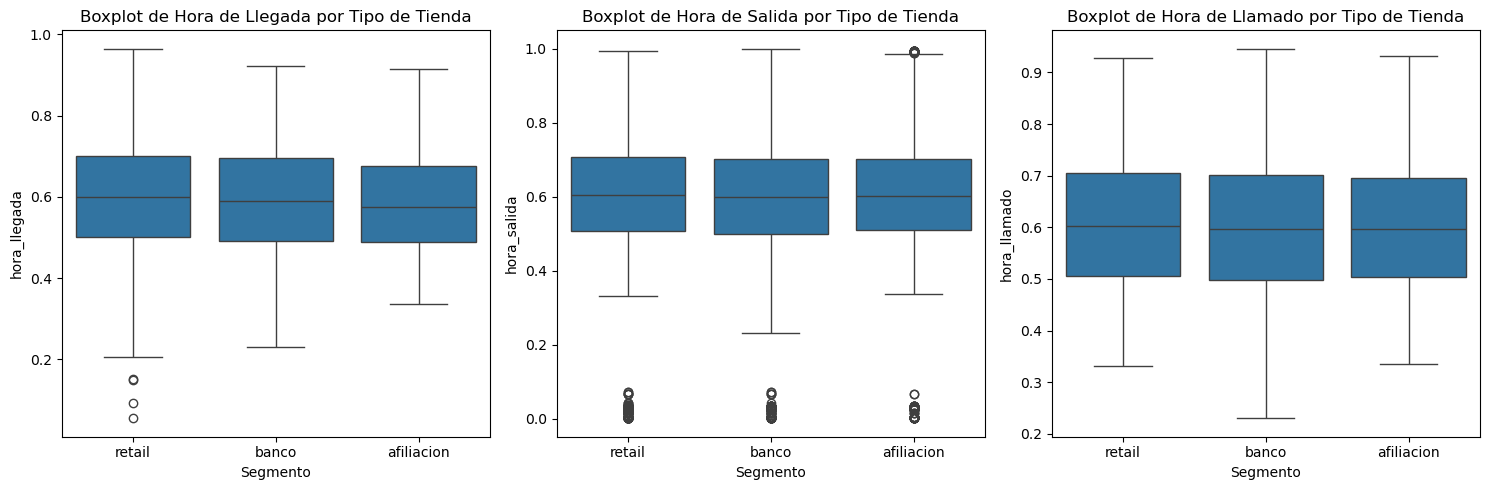

In [55]:
# Boxplot de hora de llegada, hora de salida y hora de llamado por tipo de tienda

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Segmento', y='hora_llegada', data=df)
plt.title('Boxplot de Hora de Llegada por Tipo de Tienda')

plt.subplot(1, 3, 2)
sns.boxplot(x='Segmento', y='hora_salida', data=df)
plt.title('Boxplot de Hora de Salida por Tipo de Tienda')

plt.subplot(1, 3, 3)
sns.boxplot(x='Segmento', y='hora_llamado', data=df)
plt.title('Boxplot de Hora de Llamado por Tipo de Tienda')

plt.tight_layout()

plt.show()






In [56]:
df.describe()

,hora_llegada,hora_llamado,hora_salida,tiempo_espera,tiempo_atencion,tiempo_total
count,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06
mean,5.988867e-01,6.039205e-01,6.062001e-01,5.033832e-03,2.279584e-03,7.313416e-03
std,1.195139e-01,1.192970e-01,1.200889e-01,1.142388e-02,1.645481e-02,1.998488e-02
min,5.490046e-02,2.301319e-01,1.289352e-03,-6.335417e-01,-8.891667e-01,-8.889120e-01
25%,4.971458e-01,5.024583e-01,5.048310e-01,2.777778e-04,8.333333e-04,2.129630e-03
50%,5.940440e-01,5.999815e-01,6.022269e-01,1.724537e-03,1.458333e-03,4.027778e-03
75%,6.980023e-01,7.028634e-01,7.052130e-01,5.219907e-03,2.615741e-03,8.009259e-03
max,9.643912e-01,9.456296e-01,1.000201e+00,4.227083e-01,5.930093e-01,5.947685e-01


### New Columns

In [57]:
df["tiempo_espera"] = df["hora_llamado"] - df["hora_llegada"]
df["tiempo_atencion"] = df["hora_salida"] - df["hora_llamado"]
df["tiempo_total"] = df["hora_salida"] - df["hora_llegada"]



In [58]:
df.describe()

,hora_llegada,hora_llamado,hora_salida,tiempo_espera,tiempo_atencion,tiempo_total
count,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06,1.851075e+06
mean,5.988867e-01,6.039205e-01,6.062001e-01,5.033832e-03,2.279584e-03,7.313416e-03
std,1.195139e-01,1.192970e-01,1.200889e-01,1.142388e-02,1.645481e-02,1.998488e-02
min,5.490046e-02,2.301319e-01,1.289352e-03,-6.335417e-01,-8.891667e-01,-8.889120e-01
25%,4.971458e-01,5.024583e-01,5.048310e-01,2.777778e-04,8.333333e-04,2.129630e-03
50%,5.940440e-01,5.999815e-01,6.022269e-01,1.724537e-03,1.458333e-03,4.027778e-03
75%,6.980023e-01,7.028634e-01,7.052130e-01,5.219907e-03,2.615741e-03,8.009259e-03
max,9.643912e-01,9.456296e-01,1.000201e+00,4.227083e-01,5.930093e-01,5.947685e-01


In [59]:
# Asegurar que las columnas sean de tipo float
df["hora_llegada"] = pd.to_numeric(df["hora_llegada"], errors='coerce')
df["hora_llamado"] = pd.to_numeric(df["hora_llamado"], errors='coerce')
df["hora_salida"] = pd.to_numeric(df["hora_salida"], errors='coerce')

# Función para convertir decimal de día a HH:MM:SS
def convertir_a_hora(decimal):
    if pd.isna(decimal):  # Manejar valores nulos
        return "00:00:00"
    total_segundos = float(decimal) * 24 * 3600  # Convertir a segundos totales en el día
    horas = int(total_segundos // 3600)  # Obtener horas
    minutos = int((total_segundos % 3600) // 60)  # Obtener minutos
    segundos = int(total_segundos % 60)  # Obtener segundos
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

# Aplicar la conversión a las columnas necesarias
df["hora_llegada"] = df["hora_llegada"].apply(convertir_a_hora)
df["hora_llamado"] = df["hora_llamado"].apply(convertir_a_hora)
df["hora_salida"] = df["hora_salida"].apply(convertir_a_hora)

In [60]:
# Asegurar que las columnas sean de tipo float
df["tiempo_espera"] = pd.to_numeric(df["tiempo_espera"], errors='coerce')
df["tiempo_atencion"] = pd.to_numeric(df["tiempo_atencion"], errors='coerce')
df["tiempo_total"] = pd.to_numeric(df["tiempo_total"], errors='coerce')

# Función para convertir decimal de día a HH:MM:SS
def convertir_a_hora(decimal):
    if pd.isna(decimal):  # Manejar valores nulos
        return "00:00:00"
    total_segundos = float(decimal) * 24 * 3600  # Convertir a segundos totales en el día
    horas = int(total_segundos // 3600)  # Obtener horas
    minutos = int((total_segundos % 3600) // 60)  # Obtener minutos
    segundos = int(total_segundos % 60)  # Obtener segundos
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

# Aplicar la conversión a las columnas necesarias
df["tiempo_espera"] = df["tiempo_espera"].apply(convertir_a_hora)
df["tiempo_atencion"] = df["tiempo_atencion"].apply(convertir_a_hora)
df["tiempo_total"] = df["tiempo_total"].apply(convertir_a_hora)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851075 entries, 0 to 1851074
Data columns (total 12 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Fecha            object
 1   Segmento         object
 2   hora_llegada     object
 3   hora_llamado     object
 4   hora_salida      object
 5   caja             object
 6   tienda           object
 7   status           object
 8   estado           object
 9   tiempo_espera    object
 10  tiempo_atencion  object
 11  tiempo_total     object
dtypes: object(12)
memory usage: 169.5+ MB


In [77]:
df["tienda"].nunique

<bound method IndexOpsMixin.nunique of 0          Tienda_AH
1          Tienda_AH
2          Tienda_AH
3          Tienda_AH
4          Tienda_AH
             ...    
1851070     Tienda_S
1851071     Tienda_S
1851072     Tienda_S
1851073     Tienda_S
1851074     Tienda_S
Name: tienda, Length: 1851075, dtype: object>

In [62]:
df.describe()

,Fecha,Segmento,hora_llegada,hora_llamado,hora_salida,caja,tienda,status,estado,tiempo_espera,tiempo_atencion,tiempo_total
count,1851075,1851075,1851075,1851075,1851075,1851075,1851075,1851075,1851075,1851075,1851075,1851075
unique,396,3,45296,45342,45963,76,50,2,23,11269,7744,13468
top,2023-12-16,retail,10:03:27,13:48:17,12:19:55,ventanilla_d,Tienda_A,Atendido,Veracruz de Ignacio de la Llave,00:00:03,00:00:06,00:02:12
freq,7912,998573,116,89,87,162100,58184,1720566,179554,100581,15369,5922


### Data Exploration

In [63]:
# Distribution of categorical variables
print("\Distribución por Segmento:\n", df['Segmento'].value_counts())
print("\Distribución por Tienda:\n", df['tienda'].value_counts())
print("\nStatus Count:\n", df['status'].value_counts())
print("\nState Count:\n", df['estado'].value_counts())

\Distribución por Segmento:
 Segmento
retail        998573
banco         737696
afiliacion    114806
Name: count, dtype: int64
\Distribución por Tienda:
 tienda
Tienda_A     58184
Tienda_M     55646
Tienda_BD    51512
Tienda_G     49828
Tienda_AX    49492
Tienda_B     47611
Tienda_X     45727
Tienda_H     45625
Tienda_P     45279
Tienda_BA    44541
Tienda_AE    42339
Tienda_AI    41904
Tienda_AO    41817
Tienda_AN    41184
Tienda_AB    40442
Tienda_AG    40290
Tienda_AM    40030
Tienda_AY    40022
Tienda_AL    39953
Tienda_V     39438
Tienda_R     37650
Tienda_T     37139
Tienda_BE    37072
Tienda_BC    37030
Tienda_AZ    36674
Tienda_I     36576
Tienda_K     36008
Tienda_AQ    35164
Tienda_J     35043
Tienda_AD    34454
Tienda_AJ    33855
Tienda_S     33260
Tienda_Y     33094
Tienda_Q     32796
Tienda_AC    32357
Tienda_E     32301
Tienda_AF    31909
Tienda_F     31509
Tienda_Z     30773
Tienda_U     30529
Tienda_AP    30228
Tienda_AH    30041
Tienda_L     29587
Tienda_BB    28744
Tie

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_38949/2666558735.py:2: SyntaxWarning: invalid escape sequence '\D'
  print("\Distribución por Segmento:\n", df['Segmento'].value_counts())
/tmp/ipykernel_38949/2666558735.py:3: SyntaxWarning: invalid escape sequence '\D'
  print("\Distribución por Tienda:\n", df['tienda'].value_counts())


#### Graphics

In [64]:
df.columns

Index(['Fecha', 'Segmento', 'hora_llegada', 'hora_llamado', 'hora_salida',
       'caja', 'tienda', 'status', 'estado', 'tiempo_espera',
       'tiempo_atencion', 'tiempo_total'],
      dtype='object')

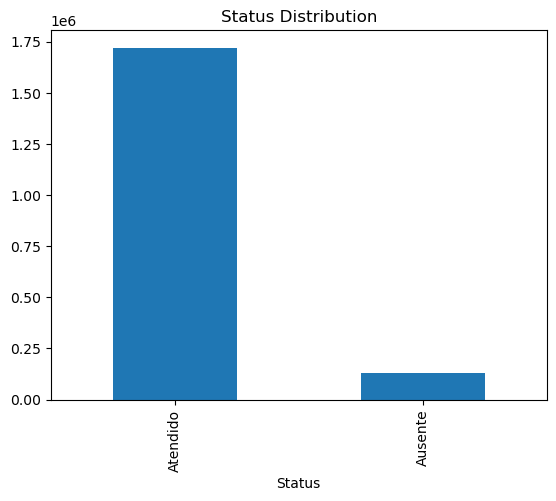

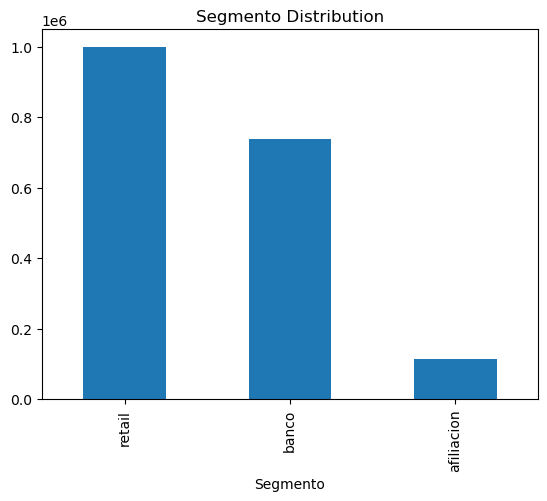

In [65]:
df['status'].value_counts().plot(kind='bar')
plt.title('Status Distribution')
plt.xlabel('Status')
plt.show()

df['Segmento'].value_counts().plot(kind='bar')
plt.title('Segmento Distribution')
plt.xlabel('Segmento')
plt.show()

### Data Sample

In [66]:
# Assuming your DataFrame is named df
# Convert the relevant columns to proper data types
df['tienda'] = df['tienda'].astype(str)
df['estado'] = df['estado'].astype(str)

# Group by 'estado' and count the unique 'tienda' values in each group
store_count_by_estado = df.groupby('estado')['tienda'].nunique().reset_index()

# Rename the columns for clarity
store_count_by_estado.columns = ['Estado', 'Number of Stores']

# Display the result
print(store_count_by_estado)

                             Estado  Number of Stores
0                   Baja California                 1
1               Baja California Sur                 1
2                           Chiapas                 3
3                         Chihuahua                 2
4                  Ciudad de México                 3
5              Coahuila de Zaragoza                 1
6                           Durango                 1
7                        Guanajuato                 3
8                          Guerrero                 2
9               Michoacán de Ocampo                 1
10                          Morelos                 1
11                           México                 3
12                       Nuevo León                 4
13                           Oaxaca                 1
14                           Puebla                 4
15                        Querétaro                 2
16                     Quintana Roo                 1
17                          

/tmp/ipykernel_38949/1105057267.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_stores_per_state, x='estado', y='unique_stores', palette='viridis')


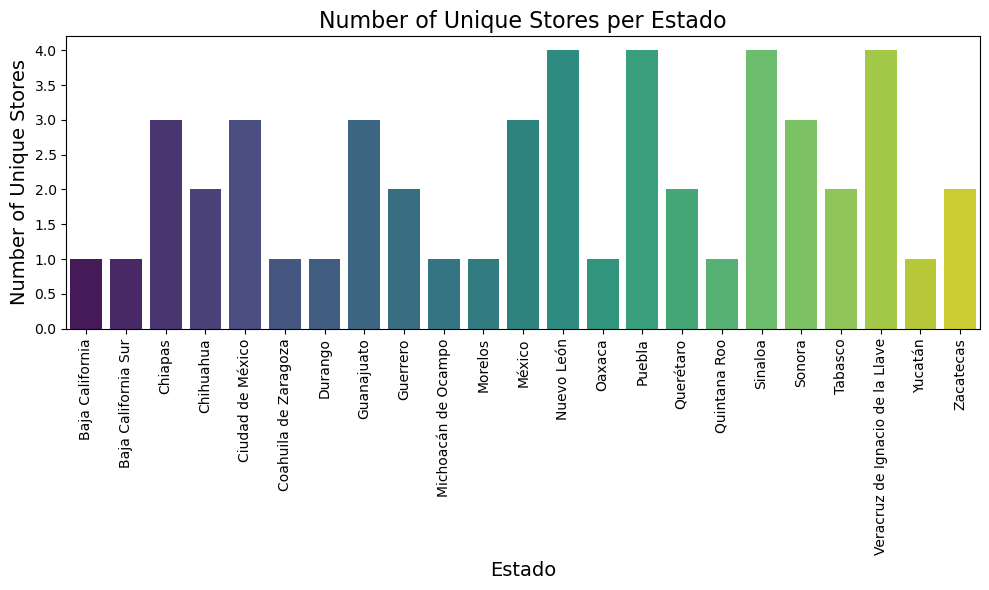

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Group by 'estado' and count unique stores
unique_stores_per_state = df.groupby('estado')['tienda'].nunique().reset_index()
unique_stores_per_state.columns = ['estado', 'unique_stores']  # Rename columns for clarity

# Step 2: Plot the data for all states using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=unique_stores_per_state, x='estado', y='unique_stores', palette='viridis')

# Add labels and title
plt.title('Number of Unique Stores per Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Number of Unique Stores', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [71]:
# Assuming your dataset is stored in a DataFrame called df
# Example: df = pd.read_csv('your_dataset.csv')

# Specify the state you're interested in
specific_state = 'Puebla'  # Replace 'NombreDelEstado' with the actual state name

# Filter the DataFrame for the specific state and count the number of stores
num_stores = df[df['estado'] == specific_state]['tienda'].nunique()

# Print the result
print(f"Number of stores in {specific_state}: {num_stores}")

Number of stores in Puebla: 4


In [11]:
import pandas as pd

# Función para convertir horas decimales a hh:mm:ss
def horas_a_hms(horas):
    segundos_totales = round(horas * 3600)  # Convertir horas a segundos
    h, m, s = segundos_totales // 3600, (segundos_totales % 3600) // 60, segundos_totales % 60
    return f"{h:02}:{m:02}:{s:02}"

# Calcular el promedio del tiempo de espera por estado
promedios_por_estado = df.groupby('estado')['tiempo_espera'].mean()

# Obtener los 5 estados con menor tiempo promedio
top_5_estados_menores = promedios_por_estado.nsmallest(5)


# Convertir los valores a formato hh:mm:ss
top_5_estados_menores_hms = top_5_estados_menores.apply(horas_a_hms)

# Mostrar los resultados
print(top_5_estados_menores_hms)

<class 'pandas.core.series.Series'>
